In [1]:
#Import required packages
import nltk, re
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import operator
import matplotlib.pyplot as plt

In [2]:
with open('sample.txt', 'r') as f:
    txt = f.read()

In [3]:
#Tokenized the text removing few characters 
words = re.split(r'[\t\n-(),:.-]+', txt)
print('Total words:', len(words))

Total words: 546


In [4]:
vocabs = sorted(set(words))
print('No. of unique set of words in the text:', len(vocabs))

No. of unique set of words in the text: 297


In [5]:
new_text = ""
for word in words:
    new_text = new_text + " " + word.lower()
processed_text = word_tokenize(new_text)[1:-1]

In [6]:
def compute_tf(text):
    wordlist = set(text)
    wordDict= dict.fromkeys(wordlist, 0)
    #calculating the occurance of each word
    for word in text:
        wordDict[word]+=1
    
    tfDict = {}
    count_words = len(text)
    for word, count in wordDict.items():
        tfDict[word] = round(count/float(count_words),4)
    return(tfDict)

In [7]:
tf = compute_tf(processed_text)
tf #without filtering out stopwords

{'factor': 0.0018,
 'lacking': 0.0018,
 'extract': 0.0018,
 'retrain': 0.0018,
 'accurate': 0.0018,
 'faces': 0.0018,
 'embeddings': 0.0037,
 'in': 0.0147,
 'success': 0.0018,
 'should': 0.0018,
 'check': 0.0018,
 'if': 0.0055,
 'one': 0.0129,
 'any': 0.0018,
 'lfw': 0.0018,
 'art': 0.0037,
 'all': 0.0018,
 'storm': 0.0018,
 'embedding': 0.0018,
 'academia': 0.0018,
 'large': 0.0074,
 'ml': 0.0018,
 'certain': 0.0018,
 'person': 0.0055,
 'been': 0.0018,
 'webface': 0.0018,
 'so': 0.0018,
 'its': 0.0018,
 'approximately': 0.0018,
 'restricted': 0.0018,
 'train': 0.0037,
 'class': 0.0055,
 'act': 0.0018,
 'actually': 0.0018,
 'particularly': 0.0018,
 'classes': 0.0037,
 'is': 0.0165,
 'vector': 0.0018,
 'to': 0.0276,
 'method': 0.0018,
 'capabilities': 0.0018,
 'such': 0.0055,
 'efforts': 0.0018,
 'article': 0.0018,
 'training': 0.0074,
 'siamese': 0.0037,
 'applicable': 0.0018,
 'mainly': 0.0018,
 'only': 0.0018,
 'million': 0.0037,
 'computational': 0.0018,
 'facebook': 0.0037,
 'this'

In [8]:
stop_words = list(set(stopwords.words('english')))
stop_words.extend(['a','so','its','if','it','in','also','by','is','for','an','or','to','these','from','can','are','they','the',
                   'with','as','and','this','of','been', 'in','being', 'that', 'if', 'it','made','called','many','want','every',
                   'per','gave', 'one', 'two','three','take','actually','moreover','quiet','lot','say','do'])

new_text1 = ""
for word in processed_text:
    if word not in stop_words:
        new_text1 = new_text1 + " " + word
filtered = word_tokenize(new_text1) 

In [9]:
tf1 = compute_tf(filtered)
tf_filtered = dict(sorted(tf1.items(), key=operator.itemgetter(1),reverse=True))
tf_filtered #post removing stop words

{'dataset': 0.0197,
 'datasets': 0.0197,
 'data': 0.0197,
 'image': 0.0164,
 'face': 0.0164,
 'recognition': 0.0164,
 'large': 0.0131,
 'training': 0.0131,
 'new': 0.0131,
 'time': 0.0131,
 'cnns': 0.0131,
 'network': 0.0131,
 'learning': 0.0131,
 'person': 0.0098,
 'class': 0.0098,
 'images': 0.0098,
 'available': 0.0098,
 'work': 0.0098,
 'shot': 0.0098,
 'model': 0.0098,
 'google': 0.0098,
 'embeddings': 0.0066,
 'art': 0.0066,
 'train': 0.0066,
 'classes': 0.0066,
 'siamese': 0.0066,
 'million': 0.0066,
 'facebook': 0.0066,
 'input': 0.0066,
 'public': 0.0066,
 'standard': 0.0066,
 'networks': 0.0066,
 'recent': 0.0066,
 'company': 0.0066,
 'community': 0.0066,
 'however': 0.0066,
 'world': 0.0066,
 'scale': 0.0066,
 'object': 0.0066,
 'using': 0.0066,
 'publicly': 0.0066,
 'state': 0.0066,
 'giants': 0.0066,
 'able': 0.0066,
 'neural': 0.0066,
 'classification': 0.0066,
 'techniques': 0.0066,
 'tasks': 0.0066,
 'employees': 0.0066,
 'great': 0.0066,
 'factor': 0.0033,
 'lacking': 

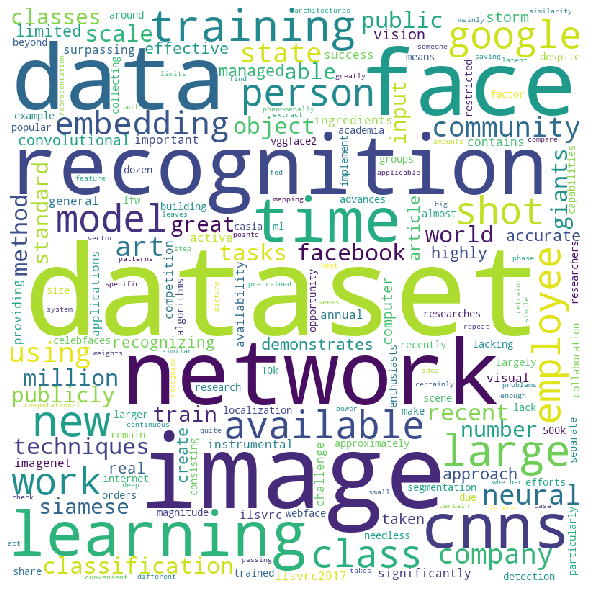

In [10]:
filtered_text = ""
for word in filtered:
    filtered_text = filtered_text + " " + word
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(filtered_text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 